# 机器学习 作业3

吴宇航 31520201153897

## 第一题 Regularization Path 曲线

In [1]:
import os
import sys
import csv
import numpy as np
import struct
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sys.path.append(os.path.dirname(os.getcwd()))
from Framework import datasets, models, utils, mocks

### 生成待拟合数据

In [2]:
x_r,dots,y_r=(0,2*np.pi),10,(-1,1) # 设置数据参数
noiser=mocks.Uniform_noise((2,),(-0.2,0.3)) # 设置噪声参数
mocker= mocks.Single_sin_mock(x_ranger=x_r,number=dots,y_ranger=y_r,noise_generator=noiser)
data=mocker.generate()

### 构造模型并进行拟合

In [3]:
ll_model=models.linear_regression(3)
model_list=[ll_model]+[models.linear_regression(3,l2=np.e**i) for i in np.linspace(-12,0,num=7)]
a=[ m.fit(data) for m in model_list]
# model_list 第一个 l2=0

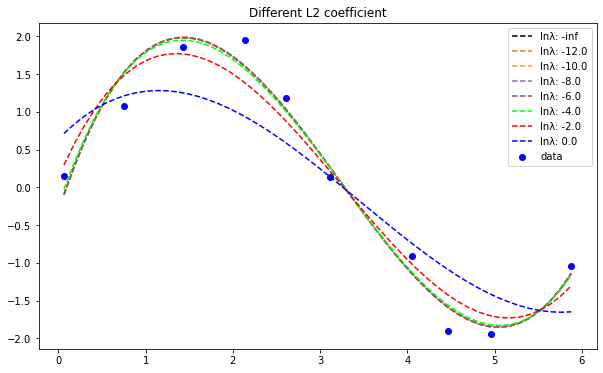

In [4]:
colors=['#000000', '#ff7f0e', '#ffa02c', '#9467bd', '#8c564b', '#00ff00', '#ff0000', '#0000ff']

upper=np.max(data[:,1])
lower=np.min(data[:,1])
fig=plt.figure(figsize=(10,6))
plt.title("Different L2 coefficient")
plt.scatter(data[:,1],data[:,0],c='b',label="data")

for index,model in enumerate(model_list):
    x=np.linspace(lower,upper,num=50)
    y=model.predict(x) 
    plt.plot(x,y,linestyle='--',c=colors[index],label="lnλ: "+str(np.log(model.l2).round(1)))
plt.legend()
plt.show()

### 可视化$w_{\lambda}$

横坐标:
$ \frac{\left\| w_{\lambda} \right \|}{\left\| w_{\infty} \right \|} $
纵坐标：$w_{\lambda}$

In [5]:
x,ys=[],np.zeros((len(model_list[1:]),ll_model.rank+1))
for i,model in enumerate(model_list[1:]):
    x.append((model.w@model.w)/(ll_model.w@ll_model.w))
    ys[i]=model.w

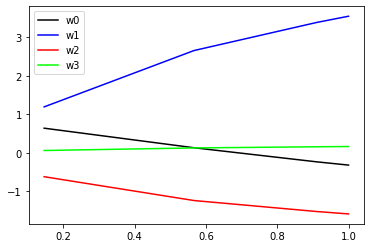

In [6]:
plt.figure()
for i,y in enumerate(ys.T):
    plt.plot(x,y,c=colors[-1*i],label="w"+str(i))
plt.legend()
plt.show()

## 第二题 参数化模型拟合曲线

### 读取数据

In [7]:
file="./pi.csv"
x,y=[],[]
with open(file,'r') as f:
    cf=csv.reader(f)
    for i,row in enumerate(cf):
        if(i==0): continue
        x.append(int(row[1]))     
        y.append(int(row[2]))
x,y=np.array(x),np.array(y)

upper=(np.max(x)+np.max(y))/2
lower=(np.min(x)+np.min(y))/2
t=np.linspace(lower,upper,num=len(x),endpoint=True)

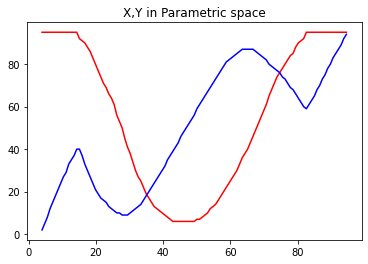

In [8]:
plt.figure()
plt.title("X,Y in Parametric space")
plt.plot(t,x,c='r')
plt.plot(t,y,c='b')
plt.show()

In [9]:
x_data=np.array([x,t]).T
y_data=np.array([y,t]).T
print(x_data.shape,y_data.shape)

(115, 2) (115, 2)


### 参数化模型并拟合

In [10]:
x_model=models.linear_regression(rank=10)
x_model.fit(x_data)

y_model=models.linear_regression(rank=10)
y_model.fit(y_data)

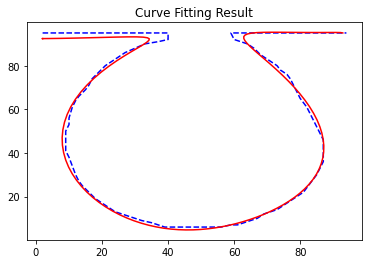

In [12]:
p_x=x_model.predict(t)
p_y=y_model.predict(t)
plt.figure()
plt.title("Curve Fitting Result")
plt.plot(y,x,linestyle='--',c="b")
plt.plot(p_y,p_x,c='r')
plt.show()